In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [83]:
# Load the Train data
train_df = pd.read_csv("D:\\SensViz\\Machine Learning Task 4\\train.csv")

In [84]:
#remove the spaces from family coloumn entries and convert the into lover case 
train_df['family'] = train_df['family'].str.replace(' ', '').str.lower()
#add the label encoder to convert them into the numeric values
label_encoder = LabelEncoder()
#convert family coloumn into numeric values
train_df['family'] = label_encoder.fit_transform(train_df['family'])

In [85]:
# Loading the holidays data set
holy_df = pd.read_csv("D:\\SensViz\\Machine Learning Task 4\\holidays_events.csv")

In [86]:
# Loading the oil data
oil_df = pd.read_csv("D:\\SensViz\\Machine Learning Task 4\\oil.csv")

In [87]:
# Merging process
# Select the relevant columns from the holidays dataset
holy_df = holy_df[['date', 'type']]

In [88]:
# Merge the train dataset with the holidays dataset based on the date column
train_merged = pd.merge(train_df, holy_df, on='date', how='left')

In [89]:
# Fill missing values in the 'type' column with 'No' to indicate non-holiday days
train_merged['type'].fillna('No', inplace=True)

In [90]:
# Rename the column to 'holiday'
train_merged.rename(columns={'type': 'holiday'}, inplace=True)

In [91]:
# Merge the oil dataset with the train_merged dataset based on the date column
train_merged = pd.merge(train_merged, oil_df[['date', 'dcoilwtico']], on='date', how='left')

In [92]:
# Convert the 'date' column to datetime type
train_merged['date'] = pd.to_datetime(train_merged['date'])

In [93]:
# Set the 'date' column as the index
train_merged.set_index('date', inplace=True)


In [94]:
# Sort the DataFrame by the index in ascending order
train_merged.sort_index(inplace=True)

In [95]:
# Interpolate the missing values in the 'dcoilwtico' column using linear interpolation
train_merged['dcoilwtico'].interpolate(method='linear', inplace=True)
print("before droping the null values",train_merged['dcoilwtico'].isnull().sum())


before droping the null values 1782


In [96]:
# Reset the index to restore the 'date' column
train_merged.reset_index(inplace=True)
train_merged.dropna(inplace=True)
train_merged['holiday'] = label_encoder.fit_transform(train_merged['holiday'])
print("after drop the null rows",train_merged['dcoilwtico'].isnull().sum())
print(train_merged.dtypes)

after drop the null rows 0
date           datetime64[ns]
id                      int64
store_nbr               int64
family                  int32
sales                 float64
onpromotion             int64
holiday                 int32
dcoilwtico            float64
dtype: object


In [97]:
train_merged['date'] = pd.to_datetime(train_merged['date'])
sales = train_merged['sales']
family = train_merged['family']
store_nbr = train_merged['store_nbr']
date = train_merged['date']#train_merged.index
holiday = train_merged['holiday']
oil = train_merged['dcoilwtico']

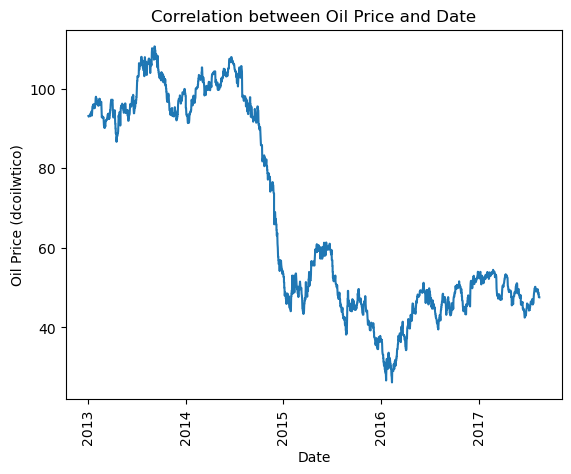

In [98]:
plt.plot(date,oil )
plt.xlabel('Date')
plt.ylabel('Oil Price (dcoilwtico)')
plt.title('Correlation between Oil Price and Date')
plt.xticks(rotation=90)
plt.show()

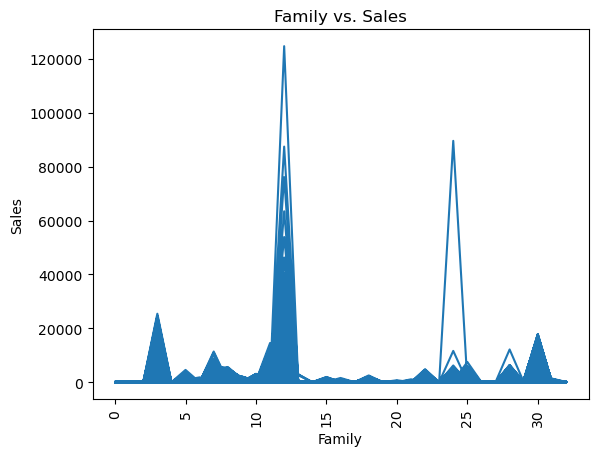

In [99]:
plt.plot(family, sales)
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Family vs. Sales')
plt.xticks(rotation=90)
plt.show()

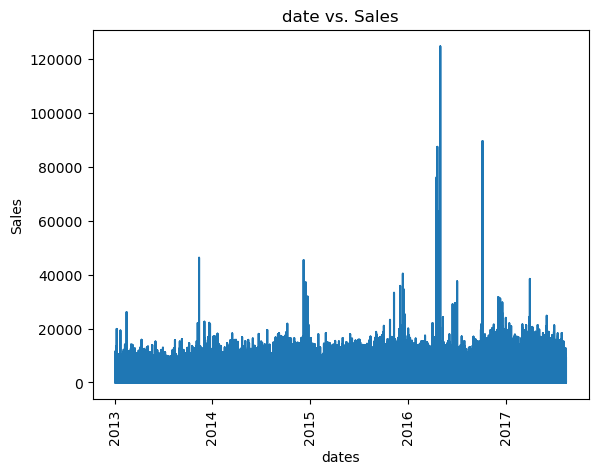

In [100]:
plt.plot(date, sales)
plt.xlabel('dates')
plt.ylabel('Sales')
plt.title('date vs. Sales')
plt.xticks(rotation=90)
plt.show()

In [101]:
#convert the tyoe of the date
train_merged['date'] = train_merged['date'].astype(np.int64) // 10**9
#now we change the date type
train_merged['date'].head()

1782    1357084800
1783    1357084800
1784    1357084800
1785    1357084800
1786    1357084800
Name: date, dtype: int64

In [103]:
#assining the values to the dependent and independent 
X = train_merged.drop(columns=['sales','holiday','dcoilwtico'])
Y = train_merged['sales']
X.shape

(2999106, 5)

In [104]:
#spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [105]:
#create the instant variable for LR
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train.values, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test.values)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 973913.9720467314


In [108]:
#Loading the test data and preprocessing on it
test_df = pd.read_csv("D:\\SensViz\\Machine Learning Task 4\\test.csv")
test_df['family'] = test_df['family'].str.replace(' ', '').str.lower()
test_df['family'] = label_encoder.fit_transform(test_df['family'])
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,0
1,3000889,2017-08-16,1,1,0
2,3000890,2017-08-16,1,2,2
3,3000891,2017-08-16,1,3,20
4,3000892,2017-08-16,1,4,0


In [109]:
#changing the type of test data
test_df['date'] = pd.to_datetime(test_df['date']).astype(np.int64) // 10**9
test_df['date'].head()

0    1502841600
1    1502841600
2    1502841600
3    1502841600
4    1502841600
Name: date, dtype: int64

In [110]:
# Predict the sales for the test data
test_pred = model.predict(test_df.values)
print(test_pred)

[1.24842315e+08 1.24842304e+08 1.24842369e+08 ... 1.24947684e+08
 1.24947978e+08 1.24947624e+08]
